<h1 id="top260" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Парсинг топ-260 фильмов с Baskino </h1> <p>В данном проекте реализован парсинг информации о 260 лучших фильмах с сайта <a href="https://lu.baskino-store.site/top.html" style="color:#FFD700;">Baskino</a>. Цель — собрать структурированные данные по каждому фильму для последующего анализа и обработки.</p> <table style="border-collapse: collapse; width: 100%; margin: 20px 0;"> <tr> <th style="border: 2px solid #B00000; padding: 10px;">Этап</th> <th style="border: 2px solid #B00000; padding: 10px;">Описание</th> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Сбор ссылок</td> <td style="border: 1px solid #B00000; padding: 8px;">Получение URL страниц каждого фильма из списка топ-260.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Парсинг страниц фильмов</td> <td style="border: 1px solid #B00000; padding: 8px;">Извлечение данных из блоков <code>info</code>, <code>description</code> и динамических блоков с ID <code>news-id-*</code>.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Обработка данных</td> <td style="border: 1px solid #B00000; padding: 8px;">Очистка, заполнение пропусков, преобразование типов данных.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Сохранение</td> <td style="border: 1px solid #B00000; padding: 8px;">Экспорт собранных данных в CSV-файл для дальнейшего анализа.</td> </tr> </table> <h1 id="data_fields" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Основные поля данных </h1> <table style="border-collapse: collapse; width: 100%; margin: 20px 0;"> <tr> <th style="border: 2px solid #B00000; padding: 10px;">Поле</th> <th style="border: 2px solid #B00000; padding: 10px;">Описание</th> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Качество</td> <td style="border: 1px solid #B00000; padding: 8px;">Качество видео (FHD, WEB-DL и т.п.).</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Название</td> <td style="border: 1px solid #B00000; padding: 8px;">Название фильма на русском языке.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Оригинальное название</td> <td style="border: 1px solid #B00000; padding: 8px;">Оригинальное название фильма.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Год</td> <td style="border: 1px solid #B00000; padding: 8px;">Год выпуска.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Дата выхода</td> <td style="border: 1px solid #B00000; padding: 8px;">Дата официального релиза.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Страна</td> <td style="border: 1px solid #B00000; padding: 8px;">Страна производства фильма.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Слоган</td> <td style="border: 1px solid #B00000; padding: 8px;">Краткий слоган фильма.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Режиссер</td> <td style="border: 1px solid #B00000; padding: 8px;">Имя режиссера.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Жанр</td> <td style="border: 1px solid #B00000; padding: 8px;">Жанры фильма.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Время</td> <td style="border: 1px solid #B00000; padding: 8px;">Продолжительность фильма.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">В главных ролях</td> <td style="border: 1px solid #B00000; padding: 8px;">Основные актеры.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Рейтинг Кинопоиск</td> <td style="border: 1px solid #B00000; padding: 8px;">Средний рейтинг на Кинопоиске.</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Описание</td> <td style="border: 1px solid #B00000; padding: 8px;">Подробное описание из нескольких блоков страницы.</td> </tr> </table>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL страницы с рейтингом фильмов
url_top = "https://lu.baskino-store.site/top.html"

# Функция для парсинга информации о фильме с отдельной страницы
def parse_movie_info(movie_url):
    try:
        response = requests.get(movie_url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "html.parser")

        info_block = soup.find("div", class_="info")
        description_block = soup.find("div", class_="description")
        news_id_block = soup.find("div", id=lambda x: x and x.startswith("news-id-"))

        if not info_block:
            print(f"Внимание: блок info не найден на странице {movie_url}")
            return None

        movie_data = {}

        # Рейтинг Кинопоиск
        rating_tag = info_block.find("strong")
        movie_data['Рейтинг Кинопоиск'] = rating_tag.text.strip() if rating_tag else "0"

        # Таблица с данными
        table = info_block.find("table")
        if table:
            for row in table.find_all("tr"):
                cells = row.find_all("td")
                if len(cells) == 2:
                    key = cells[0].text.strip().rstrip(':')
                    value = cells[1].text.strip()
                    movie_data[key] = value

        # Описание из description_block
        description_text = ""
        if description_block:
            paragraphs = description_block.find_all("p")
            description_text = " ".join(p.get_text(strip=True) for p in paragraphs)

        # Описание из news_id_block
        news_id_text = ""
        if news_id_block:
            elements = news_id_block.find_all(["h2", "p"])
            if elements:
                news_id_text = " ".join(el.get_text(strip=True) for el in elements)
            else:
                news_id_text = news_id_block.get_text(strip=True)

        full_description = (description_text + " " + news_id_text).strip()
        if not full_description:
            print(f"Описание для фильма на странице {movie_url} пустое.")
            full_description = "Описание не найдено."

        movie_data['Описание'] = full_description

        # Проверка важных полей
        important_fields = ['Качество', 'Название', 'Год', 'Режиссер', 'Жанр', 'Рейтинг Кинопоиск', 'Описание']
        for field in important_fields:
            if field not in movie_data or not movie_data[field].strip():
                print(f"Внимание: поле '{field}' пустое или не найдено на странице {movie_url}")

        return movie_data

    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе страницы {movie_url}: {e}")
        return None
    except Exception as e:
        print(f"Ошибка при обработке страницы {movie_url}: {e}")
        return None


# Основная функция для парсинга списка фильмов и их информации
def parse_top_movies(url, num_movies=250): #Ограничимся двумя фильмами
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "html.parser")

        # Поиск всех ссылок на фильмы в блоке "list posts"
        movie_links = []
        list_posts_div = soup.find("div", {"id": "listposts", "class": "listposts"})
        if list_posts_div:
            for ul in list_posts_div.find_all("ul", class_="content_list_top"):
                for li in ul.find_all("li"):
                    a_tag = li.find("a")
                    if a_tag and a_tag.has_attr("href"):
                        movie_links.append(a_tag["href"])
        else:
            print("Блок 'list posts' не найден на странице.")
            return None

        # Обработка первых num_movies фильмов
        movie_data = []
        for i, link in enumerate(movie_links[:num_movies]):
            print(f"Обработка фильма {i+1}/{num_movies}: {link}")
            movie_info = parse_movie_info(link)
            if movie_info:
                movie_data.append(movie_info)

        return movie_data

    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе страницы {url}: {e}")
        return None
    except Exception as e:
        print(f"Ошибка при обработке страницы {url}: {e}")
        return None

# Запуск парсинга
if __name__ == "__main__":
    top_movies_data = parse_top_movies(url_top)

    if top_movies_data:
        # Вывод DataFrame
        df = pd.DataFrame(top_movies_data)
        
        # Проверка наличия столбца 'Описание'
        if 'Описание' not in df.columns:
            df['Описание'] = pd.NA
            print("Столбец 'Описание' добавлен в DataFrame.")
        else:
            print("Столбец 'Описание' уже существует в DataFrame.")

        print(df)

        # Сохранение в CSV
        df.to_csv("top_movies_with_description.csv", index=False, encoding='utf-8')
        print("Данные сохранены в файл top_movies_with_description.csv")
    else:
        print("Не удалось получить данные о фильмах.")

Обработка фильма 1/250: https://lu.baskino-store.site/dramy/247-viktor-frankenshtejn-2015.html
Обработка фильма 2/250: https://lu.baskino-store.site/boeviki/2959-uschele-2025.html
Обработка фильма 3/250: https://lu.baskino-store.site/dramy/8498-prostitutki-2023.html
Обработка фильма 4/250: https://lu.baskino-store.site/trillery/8496-pobeg-2024.html
Обработка фильма 5/250: https://lu.baskino-store.site/trillery/8531-zapadnja-2025.html
Обработка фильма 6/250: https://lu.baskino-store.site/boeviki/6458-zahochu-i-soskochu-master-klass-2017.html
Обработка фильма 7/250: https://lu.baskino-store.site/filmy/8576-po-sledu-teni-2024.html
Внимание: поле 'Режиссер' пустое или не найдено на странице https://lu.baskino-store.site/filmy/8576-po-sledu-teni-2024.html
Обработка фильма 8/250: https://lu.baskino-store.site/trillery/8590-kukla-reinkarnacija-2025.html
Обработка фильма 9/250: https://lu.baskino-store.site/dramy/8517-kozel-otpuschenija-2023.html
Обработка фильма 10/250: https://lu.baskino-sto

df.info()

In [2]:
df['Слоган'] = df['Слоган'].fillna("Не указан.")

In [3]:
# Количество пропусков по столбцам
missing_values = df.isnull().sum()
print("Пропущенные значения по столбцам:")
print(missing_values)

Пропущенные значения по столбцам:
Рейтинг Кинопоиск         0
Качество                  0
Название                  0
Оригинальное название     0
Год                       0
Дата выхода              15
Страна                    0
Слоган                    0
Режиссер                  0
Жанр                      0
Время                     0
В главных ролях           0
Описание                  0
dtype: int64


In [4]:
df['Дата выхода'] = df['Дата выхода'].fillna("Не указана.")

In [5]:
df['Рейтинг Кинопоиск'] = pd.to_numeric(df['Рейтинг Кинопоиск'], errors='coerce').fillna(0.0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Рейтинг Кинопоиск      250 non-null    float64
 1   Качество               250 non-null    object 
 2   Название               250 non-null    object 
 3   Оригинальное название  250 non-null    object 
 4   Год                    250 non-null    object 
 5   Дата выхода            250 non-null    object 
 6   Страна                 250 non-null    object 
 7   Слоган                 250 non-null    object 
 8   Режиссер               250 non-null    object 
 9   Жанр                   250 non-null    object 
 10  Время                  250 non-null    object 
 11  В главных ролях        250 non-null    object 
 12  Описание               250 non-null    object 
dtypes: float64(1), object(12)
memory usage: 25.5+ KB


In [7]:
# Сохранение в CSV
df.to_csv("top_movies_cleaned.csv", index=False, encoding='utf-8')
print("Очищенные данные сохранены в top_movies_cleaned.csv")

Очищенные данные сохранены в top_movies_cleaned.csv


<h1 id="dataset_analysis" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Анализ нашего датасета </h1> <ul> <li><strong>Объём данных:</strong> 250 записей — достаточный размер для базового анализа и построения моделей, связанных с киноиндустрией.</li> <li><strong>Структура данных:</strong> 13 столбцов — <code>Рейтинг Кинопоиск</code>, <code>Качество</code>, <code>Название</code>, <code>Оригинальное название</code>, <code>Год</code>, <code>Дата выхода</code>, <code>Страна</code>, <code>Слоган</code>, <code>Режиссёр</code>, <code>Жанр</code>, <code>Время</code>, <code>В главных ролях</code>, <code>Описание</code>. Все поля заполнены, пропусков нет, что обеспечивает целостность данных.</li> <li><strong>Типы данных:</strong> Текстовые поля представлены как <code>object</code>, рейтинг — <code>float64</code>, год — строка (<code>object</code>), что удобно для последующей конвертации и обработки.</li> <li><strong>Качество данных:</strong> Текстовые поля содержат информативный и разнообразный контент, подходящий для задач анализа текста и NLP. Даты представлены в строковом формате, что требует преобразования для временного анализа.</li> <li><strong>Подход к обработке:</strong> Будут рименены стандартные методы предобработки текста: очистка, токенизация, удаление стоп-слов, лемматизация и векторизация с помощью TF-IDF.</li> <li><strong>Идеи для дальнейшей работы:</strong> <ul> <li>Преобразовать даты и годы в формат datetime для анализа по времени.</li> <li>Изучить распределение рейтингов и жанров для выявления закономерностей.</li> <li>Визуализировать ключевые показатели и текстовые данные (облака слов, распределения).</li> <li>Построить модели машинного обучения для классификации жанров по описаниям фильмов.</li> </ul> </li> </ul>

 <h1 id="dataset_goal" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Цель проекта </h1> <ul> <li><strong>Основная задача:</strong> построить модель, которая по текстовому описанию фильма сможет предсказывать его кластер (класс), используя методы обработки естественного языка (NLP) и машинного обучения.</li> <li><strong>Подход:</strong> текст описания преобразуется в числовой вектор с помощью TF-IDF и других векторизаторов.</li> <li><strong>Модель:</strong> обучается классификатор (например, логистическая регрессия, SVM или случайный лес), который по вектору текста предсказывает жанр.</li> <li><strong>Преимущества:</strong> <ul> <li>Упрощение задачи по сравнению со сложными рекомендательными системами.</li> <li>Автоматическая категоризация новых фильмов по жанрам.</li> <li>Использование текстовой информации — одного из самых информативных признаков.</li> </ul> </li> <li><strong>Этапы работы:</strong> <ul> <li><em>Предобработка текста:</em> очистка, токенизация, удаление стоп-слов, лемматизация, векторизация TF-IDF. <h1 id="advantages" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Плюсы нашего датасета и подхода </h1> <ul> <li><strong>Отсутствие пропусков:</strong> Все ключевые поля заполнены, что обеспечивает надёжность анализа.</li> <li><strong>Разнообразие признаков:</strong> Наличие текстовых, числовых и категориальных данных.</li> <li><strong>Информативность текстов:</strong> Подробные описания фильмов дают возможность эффективно использовать NLP для классификации.</li> <li><strong>Гибкость и масштабируемость:</strong> Модель можно применять для автоматической классификации новых фильмов и расширять на другие задачи.</li> </ul>

In [8]:
# нужно увеличить количество отображаемых строк и столбцов
pd.set_option('display.max_rows', 100)       # показывать до 100 строк
pd.set_option('display.max_columns', 50)     # показывать до 50 столбцов
pd.set_option('display.max_colwidth', 1000)  # максимальная ширина столбца 1000 символов
#возврат  -pd.reset_option('all')

In [9]:
df.rename(columns={
    'Рейтинг Кинопоиск': 'rating_kinopoisk',
    'Качество': 'quality',
    'Название': 'title',
    'Оригинальное название': 'original_title',
    'Год': 'year',
    'Дата выхода': 'release_date',
    'Страна': 'country',
    'Слоган': 'slogan',
    'Режиссер': 'director',
    'Жанр': 'genre',
    'Время': 'duration',
    'В главных ролях': 'main_cast',
    'Описание': 'description'
}, inplace=True)


In [10]:
import re
import string

# Функция для проверки наличия HTML-тегов
def contains_html(text):
    if not isinstance(text, str):
        return False
    pattern = re.compile(r'<[^>]+>')
    return bool(pattern.search(text))

# Функция для очистки текста
def clean_text_conditional(text):
    if not isinstance(text, str):
        return ""
    # Удаляем HTML-теги, если есть
    if re.search(r'<[^>]+>', text):
        text = BeautifulSoup(text, 'lxml').get_text()
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию
    text = "".join([ch if ch not in string.punctuation else " " for ch in text])
    # Удаляем цифры
    text = "".join([ch if not ch.isdigit() else " " for ch in text])
    # Удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Применяем очистку к столбцу 'description'
df['clean_description'] = df['description'].apply(clean_text_conditional)

# Выводим первые 5 строк для проверки
print(df[['description', 'clean_description']].head(5))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               descripti

 текста и красивые выводы в стиле вашего примера:

<h1 id="text_cleaning" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Этап 1: Очистка текстовых данных </h1> <ul> <li><strong>Удаление HTML-тегов:</strong> Все HTML-теги и разметка были успешно удалены из описаний фильмов с помощью <code>BeautifulSoup</code>. Это позволило избавиться от технического шума и оставить только чистый текст, пригодный для анализа.</li> <li><strong>Приведение к нижнему регистру:</strong> Все символы были приведены к нижнему регистру, что унифицировало текст и уменьшило размер словаря для последующей обработки.</li> <li><strong>Удаление пунктуации и цифр:</strong> Из текстов полностью удалены знаки препинания, специальные символы и цифры, что сделало данные более однородными и удобными для токенизации.</li> <li><strong>Удаление лишних пробелов:</strong> Были устранены множественные пробелы и табуляции, что обеспечило чистоту и компактность текста.</li> <li><strong>Качество очистки:</strong> Тексты сохранили свою смысловую нагрузку, при этом избавились от всего лишнего. Например:<br> <ul> <li><em>Исходный текст:</em> <br> <code>Фильм "Виктор Франкенштейн" (2015) ... Режиссером картины выступил Пол Макгиган, а сценарий написан Мэри Шеффер и Полом Макгиганом. ...</code> </li> <li><em>Очищенный текст:</em> <br> <code>фильм виктор франкенштейн фильм виктор франкенштейн вышедший в году представляет собой уникальную интерпретацию классической истории о создании монстра режиссером картины выступил пол макгиган ...</code> </li> </ul> </li> <li><strong>Готовность к дальнейшей обработке:</strong> Теперь очищенный текст полностью готов для следующих этапов: токенизации, удаления стоп-слов, лемматизации и векторизации.</li> </ul>
<h1 id="next_steps" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Дальнейшие шаги </h1> <ul> <li>Провести токенизацию и удалить стоп-слова для выделения наиболее информативных терминов.</li> <li>Выполнить лемматизацию для нормализации слов и уменьшения размерности признаков.</li> <li>Построить облака слов и приступить к векторизации текста для подготовки к моделированию.</li> </ul>

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Загрузка необходимых ресурсов NLTK 
nltk.download('punkt')
nltk.download('stopwords')

# Русский список стоп-слов
russian_stopwords = set(stopwords.words('russian'))

def tokenize_and_remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text, language='russian')
    filtered_tokens = [word for word in tokens if word not in russian_stopwords and len(word) > 1]
    return " ".join(filtered_tokens)

# Применяем функцию к очищенному тексту
df['tokenized_description'] = df['clean_description'].apply(tokenize_and_remove_stopwords)

# Проверяем результат
print(df[['clean_description', 'tokenized_description']].head(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aniwe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniwe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         clean_descripti

<h1 id="tokenization" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Этап 2: Токенизация и удаление стоп-слов </h1> <ul> <li><strong>Токенизация:</strong> Каждый очищенный текст был разбит на отдельные слова (токены) с помощью <code>word_tokenize</code> из NLTK. Это структурировало текст и подготовило его к дальнейшей обработке.</li> <li><strong>Удаление стоп-слов:</strong> Из текстов были удалены наиболее частотные и малоинформативные слова русского языка (например, "и", "в", "на", "что", "который", "также" и др.), что позволило сфокусироваться на ключевых терминах и повысить информативность данных.</li> <li><strong>Компактность и информативность:</strong> Тексты стали значительно короче, но при этом сохранили основную смысловую нагрузку. Например:<br> <ul> <li><em>До обработки:</em> <br> <code>фильм виктор франкенштейн фильм виктор франкенштейн вышедший в году представляет собой уникальную интерпретацию классической истории о создании монстра режиссером картины выступил пол макгиган ...</code> </li> <li><em>После токенизации и удаления стоп-слов:</em> <br> <code>фильм виктор франкенштейн фильм виктор франкенштейн вышедший году представляет собой уникальную интерпретацию классической истории создании монстра режиссером картины выступил пол макгиган ...</code> </li> </ul> </li> <li><strong>Готовность к следующим этапам:</strong> Тексты теперь готовы к лемматизации, векторизации и построению признаков для машинного обучения.</li> </ul>
<h1 id="next_steps" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Дальнейшие шаги </h1> <ul> <li>Выполнить лемматизацию для приведения слов к их нормальной форме.</li> <li>Провести векторизацию текста (TF-IDF, CountVectorizer) для построения признаков.</li> <li>Использовать полученные признаки для построения и обучения моделей классификации жанров фильмов.</li> </ul>

In [12]:
import pymorphy3
from nltk.tokenize import word_tokenize

# Инициализация морфологического анализатора
morph = pymorphy3.MorphAnalyzer()

def lemmatize_text(text):
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text, language='russian')
    lemm_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    return " ".join(lemm_tokens)

# Применяем лемматизацию к токенизированному тексту
df['lemmatized_description'] = df['tokenized_description'].apply(lemmatize_text)

# Проверяем результат
print(df[['tokenized_description', 'lemmatized_description']].head(10))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     tokenized_descripti

<h1 id="lemmatization" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Этап 3: Лемматизация </h1> <ul> <li><strong>Преобразование слов к нормальной форме:</strong> С помощью <code>pymorphy3</code> каждое слово было приведено к своей лемме — словарной форме, что позволило объединить разные грамматические формы одного слова.</li> <li><strong>Уменьшение размерности словаря:</strong> Лемматизация значительно сократила количество уникальных слов, что улучшает качество признаков и снижает шум в данных.</li> <li><strong>Сохранение смысла:</strong> Несмотря на нормализацию, текст сохранил основную смысловую нагрузку, что важно для последующего анализа и обучения моделей.</li> <li><strong>Пример преобразования:</strong><br> <ul> <li><em>До лемматизации:</em> <br> <code>фильм виктор франкенштейн фильм виктор франкенштейн вышедший году представляет собой уникальную интерпретацию классической истории создании монстра режиссером картины выступил пол макгиган ...</code></li> <li><em>После лемматизации:</em> <br> <code>фильм виктор франкенштейн фильм виктор франкенштейн выйти год представлять собой уникальный интерпретация классический история создание монстр режиссер картина выступать пол макгиган ...</code></li> </ul> </li> <li><strong>Готовность к векторизации:</strong> Лемматизированный текст полностью готов для построения признаков с помощью TF-IDF или других методов векторизации.</li> </ul>
<h1 id="next_steps" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Дальнейшие шаги </h1> <ul> <li>Провести векторизацию лемматизированного текста (TF-IDF, CountVectorizer) для создания числовых признаков.</li> <li>Добавить дополнительные числовые признаки, связанные с характеристиками текста (длина текста, средняя длина слова и др.).</li> <li>Визуализировать данные с помощью облаков слов для оценки ключевых тем.</li> <li>Приступить к построению моделей классификации жанров фильмов.</li> </ul>        

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import string

# Мешок слов (CountVectorizer)
count_vectorizer_lem = CountVectorizer(min_df=2, ngram_range=(1, 3))
X_lemma_count = count_vectorizer_lem.fit_transform(df['lemmatized_description'])

# TF-IDF (TfidfVectorizer)
tfidf_vectorizer_lem = TfidfVectorizer(min_df=2, ngram_range=(1, 3))
X_lemma_tfidf = tfidf_vectorizer_lem.fit_transform(df['lemmatized_description'])

print(f"Размерность мешка слов (лемматизация): {X_lemma_count.shape}")
print(f"Размерность TF-IDF (лемматизация): {X_lemma_tfidf.shape}")

Размерность мешка слов (лемматизация): (250, 10158)
Размерность TF-IDF (лемматизация): (250, 10158)


In [14]:
# Добавление дополнительных числовых признаков
def text_features(text):
    length_chars = len(text)
    words = text.split()
    length_words = len(words)
    punctuation_count = sum([1 for char in text if char in string.punctuation])
    digit_count = sum([1 for char in text if char.isdigit()])
    avg_word_len = sum(len(word) for word in words) / length_words if length_words > 0 else 0
    punctuation_ratio = punctuation_count / length_chars if length_chars > 0 else 0
    digit_ratio = digit_count / length_chars if length_chars > 0 else 0
    
    return pd.Series({
        'length_chars': length_chars,
        'length_words': length_words,
        'punctuation_ratio': punctuation_ratio,
        'digit_ratio': digit_ratio,
        'avg_word_len': avg_word_len
    })

# Применяем к лемматизированному тексту
additional_features = df['lemmatized_description'].apply(text_features)
df = pd.concat([df, additional_features], axis=1)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating_kinopoisk        250 non-null    float64
 1   quality                 250 non-null    object 
 2   title                   250 non-null    object 
 3   original_title          250 non-null    object 
 4   year                    250 non-null    object 
 5   release_date            250 non-null    object 
 6   country                 250 non-null    object 
 7   slogan                  250 non-null    object 
 8   director                250 non-null    object 
 9   genre                   250 non-null    object 
 10  duration                250 non-null    object 
 11  main_cast               250 non-null    object 
 12  description             250 non-null    object 
 13  clean_description       250 non-null    object 
 14  tokenized_description   250 non-null    ob

In [15]:
#Проверяем признаки с нулевой дисперсией в additional_features
zero_variance_cols = [col for col in additional_features.columns if (additional_features[col] == 0).all()]

# Удаляем эти признаки из additional_features и из combined_df (если уже объединены)
additional_features = additional_features.drop(columns=zero_variance_cols)

# Если признаки уже объединены с combined_df, удаляем их там тоже
df = df.drop(columns=zero_variance_cols)

print(f"Удалены признаки с нулевой дисперсией: {zero_variance_cols}")
print(df.head())

Удалены признаки с нулевой дисперсией: ['punctuation_ratio', 'digit_ratio']
   rating_kinopoisk         quality                title       original_title  \
0             6.200     FHD (1080p)  Виктор Франкенштейн  Victor Frankenstein   
1             0.000  WEB-DL, WEBRip               Ущелье            The Gorge   
2             4.472          WEB-DL          Проститутки                 Suki   
3             5.489  WEB-DL, WEBRip                Побег               Escape   
4             6.242          WEB-DL              Западня               Locked   

   year      release_date                      country                 slogan  \
0  2015        2015-11-10  США, Великобритания, Канада  Монстр создал монстра   
1  2025   14 февраля 2025          США, Великобритания             Не указан.   
2  2023   24 февраля 2023                    Филиппины             Не указан.   
3  2024  27 сентября 2024                      Испания   За решетку и обратно   
4  2025     20 марта 2025       

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rating_kinopoisk        250 non-null    float64
 1   quality                 250 non-null    object 
 2   title                   250 non-null    object 
 3   original_title          250 non-null    object 
 4   year                    250 non-null    object 
 5   release_date            250 non-null    object 
 6   country                 250 non-null    object 
 7   slogan                  250 non-null    object 
 8   director                250 non-null    object 
 9   genre                   250 non-null    object 
 10  duration                250 non-null    object 
 11  main_cast               250 non-null    object 
 12  description             250 non-null    object 
 13  clean_description       250 non-null    object 
 14  tokenized_description   250 non-null    ob

h1 id="vectorization_analysis" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Анализ результатов векторизации и признаков </h1> <ul> <li><strong>Размерность векторизации:</strong> Мешок слов (CountVectorizer) и TF-IDF, применённые к лемматизированным описаниям фильмов, дали матрицы размером <code>(250, 10158)</code>. Это означает, что в корпусе выделено более 10 тысяч уникальных n-грамм (1-3 слова), что обеспечивает достаточно богатое и информативное представление текстов для обучения моделей.</li> <li><strong>Объём и полнота данных:</strong> В датафрейме <code>df</code> содержится 250 записей и 19 столбцов после удаления признаков с нулевой дисперсией. Все записи заполнены полностью, пропусков нет, что гарантирует надёжность и стабильность последующего анализа и обучения моделей.</li> <li><strong>Удаление признаков с нулевой дисперсией:</strong> Были выявлены и удалены признаки, не содержащие вариаций (все значения равны нулю), что позволило повысить качество данных и эффективность моделей.</li> <li><strong>Оставшиеся числовые признаки:</strong> - <code>length_chars</code> — длина описания в символах - <code>length_words</code> — количество слов в описании - <code>avg_word_len</code> — средняя длина слова Эти признаки отражают основные характеристики текста и могут служить полезными дополнительными признаками при обучении моделей классификации жанров.</li> <li><strong>Структура данных:</strong> Помимо текстовых признаков, в датафрейме сохранены важные метаданные фильмов: рейтинг, качество, название, год, страна, режиссёр, жанр и другие. Такая комплексная структура позволяет строить эффективные модели для классификации и рекомендаций.</li> </ul> <h1 id="recommendations" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Идеи и дальнейшие шаги </h1> <ul> <li>Использовать TF-IDF векторизацию лемматизированных описаний как основной источник признаков для моделей классификации жанров.</li> <li>Включать числовые признаки длины текста и средней длины слова для повышения качества предсказаний.</li> <li>Проводить анализ важности признаков и при необходимости отбирать наиболее информативные.</li> <li>Обучить и оценить модели машинного обучения (логистическая регрессия, SVM, случайный лес и др.) для предсказания жанра фильма по его описанию.</li> <li>Использовать обученную модель для автоматического определения жанров новых фильмов на основе их описаний, что позволит быстро и точно классифицировать новые данные.</li> <li>Рассмотреть визуализацию данных (облака слов, распределения признаков) для лучшего понимания текстового корпуса и интерпретации моделей.</li> </ul>

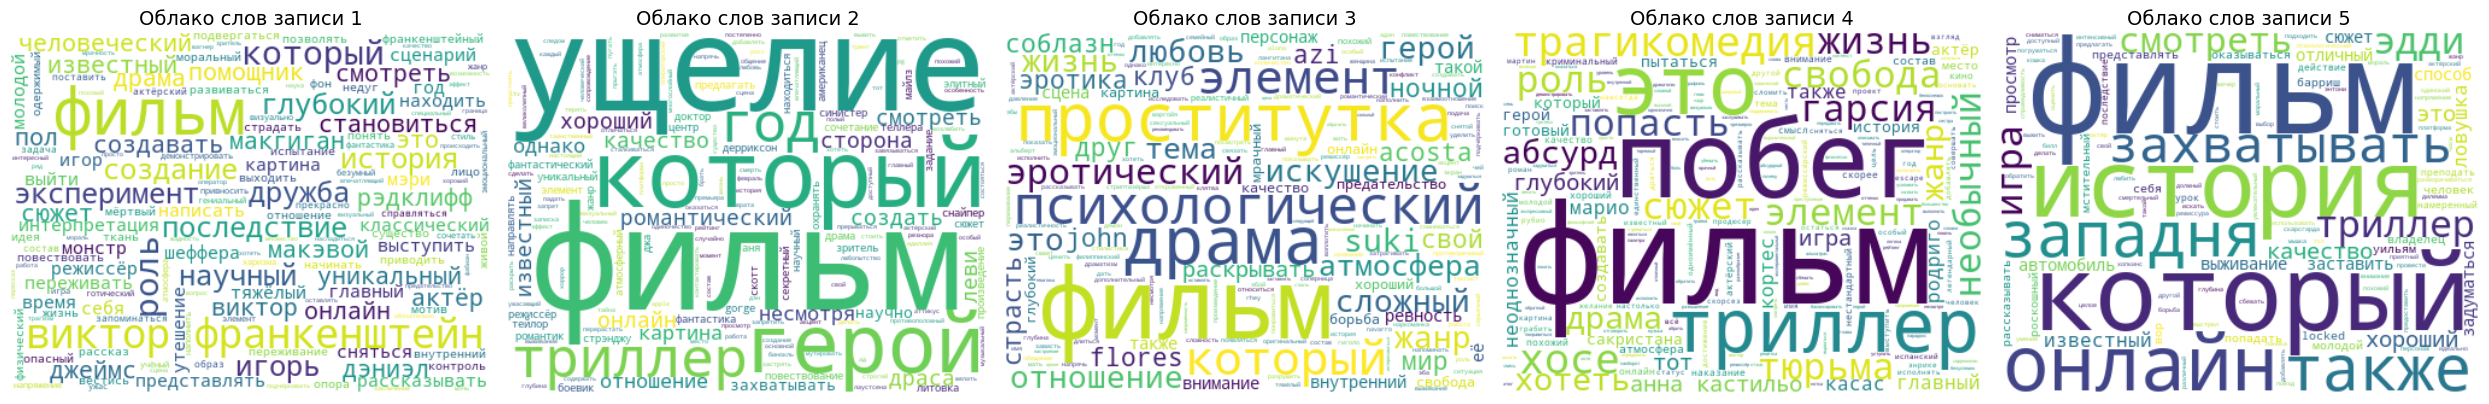

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, ax in enumerate(axes):
    text = df.loc[i, 'lemmatized_description']
    wordcloud = WordCloud(
        width=400,
        height=300,
        background_color='white',
        colormap='viridis'
    ).generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Облако слов записи {i+1}', fontsize=14)

plt.tight_layout()
plt.show()

In [20]:
#df.to_csv("film_dataset.csv", index=False, encoding='utf-8')
#print("Датасет успешно сохранён в файл film_dataset.csv")

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import string
import pymorphy3

# Загрузим необходимые ресурсы NLTK (если ещё не загружены)
nltk.download('punkt')
nltk.download('stopwords')

# Получаем список русских стоп-слов
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aniwe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniwe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Удаляем HTML-теги
    text = BeautifulSoup(text, 'lxml').get_text()
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию
    text = "".join(ch if ch not in string.punctuation else " " for ch in text)
    # Удаляем цифры
    text = "".join(ch if not ch.isdigit() else " " for ch in text)
    # Удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Применяем к столбцу с описаниями фильмов
df['clean_description'] = df['description'].apply(clean_text)

In [23]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text, language='russian')
    filtered_tokens = [word for word in tokens if word not in russian_stopwords and len(word) > 1]
    return " ".join(filtered_tokens)

df['tokenized_description'] = df['clean_description'].apply(tokenize_and_remove_stopwords)

In [24]:
morph = pymorphy3.MorphAnalyzer()

def lemmatize_text(text):
    tokens = word_tokenize(text, language='russian')
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    return " ".join(lemmatized_tokens)

df['lemmatized_description'] = df['tokenized_description'].apply(lemmatize_text)

In [25]:
print(df[['description', 'clean_description', 'tokenized_description', 'lemmatized_description']].head(5))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               descripti

<h2 id="summary" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Общий вывод </h2>
Корректность этапов: Все этапы предобработки выполнены качественно — текст очищен, токенизирован, лишние слова удалены, а лемматизация прошла успешно.

Готовность к моделированию: Описания фильмов теперь полностью готовы для векторизации (TF-IDF), тематического моделирования, кластеризации и построения классификаторов жанров.

Рекомендация: Можно переходить к следующему этапу — TF-IDF векторизации лемматизированных описаний и тематическому моделированию

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Параметры векторизатора аналогичны примеру
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=0.01,
    max_features=10000,
    ngram_range=(1, 3),
    sublinear_tf=True,
    use_idf=True
)

# Применяем TF-IDF к лемматизированным описаниям
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_description'])

print(f"Размерность TF-IDF матрицы: {tfidf_matrix.shape}")


Размерность TF-IDF матрицы: (250, 5240)


In [27]:
n_topics = 5  # число тем (можно менять)

lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_model.fit(tfidf_matrix)

feature_names = tfidf_vectorizer.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    terms_in_topic = [feature_names[idx] for idx in comp.argsort()[:-11:-1]]
    print(f"Тема {i}: {', '.join(terms_in_topic)}")

Тема 0: сериал, зритель, история, свой, драма, атмосфера, триллер, роль, мир, год
Тема 1: различный, платформа, включать, вокруг, различный платформа, хотеть смотреть онлайн, приключение, хотеть смотреть, сериал, такой
Тема 2: сериал, онлайн сериал, смотреть онлайн сериал, криминальный, похожий сериал, сериал хороший, сериал хороший качество, каждый, онлайн сериал хороший, криминальный драма
Тема 3: миллион, сериал, доллар, миллион доллар, технический, бюджет, впечатляющий, повествование, картина, час
Тема 4: сериал, платформа, включать, различный платформа, детектив, различный, любить, тайна, психологический, криминальный


<h1 id="lsa_analysis" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Анализ результатов TF-IDF векторизации и тематического моделирования (LSA) </h1> <ul> <li><strong>Размерность TF-IDF матрицы:</strong> <code>(250, 5240)</code> — это значит, что в корпусе фильмов выделено 5240 уникальных информативных n-грамм (от 1 до 3 слов). Такой размер признакового пространства достаточно хорош для представления текстов и дальнейшего моделирования.</li> <li><strong>Темы, выявленные LSA:</strong> Были выделены 5 основных тем, каждая из которых отражает ключевые смысловые направления в описаниях фильмов: <ul> <li><em>Тема 0:</em> Основные жанровые и сюжетные характеристики — слова «сериал», «зритель», «история», «драма», «атмосфера», «триллер», «роль», «мир», «год» указывают на описание жанра и общего настроения фильма.</li> <li><em>Тема 1:</em> Платформы и предпочтения зрителей — «платформа», «включать», «хотеть смотреть онлайн», «приключение», «сериал» — отражают аспекты просмотра и доступности контента.</li> <li><em>Тема 2:</em> Криминальные сериалы и качество — «криминальный», «онлайн сериал», «похожий сериал», «сериал хороший качество» — выделяют криминальную тематику и оценку качества.</li> <li><em>Тема 3:</em> Бюджет и технические характеристики — «миллион», «доллар», «технический», «бюджет», «впечатляющий», «повествование» — связаны с производственными аспектами фильмов.</li> <li><em>Тема 4:</em> Детектив и психологический триллер — «детектив», «психологический», «тайна», «криминальный» — отражают жанровую специфику и сюжетные особенности.</li> </ul> </li> <li><strong>Интерпретация:</strong> Темы хорошо отражают ключевые аспекты описаний фильмов: жанры, сюжетные линии, качество, технические детали и платформы просмотра. Это подтверждает, что LSA успешно выявил смысловые группы в тексте.</li> <li><strong>Готовность к следующему этапу:</strong> Полученные темы можно использовать для кластеризации фильмов и последующего обучения моделей классификации жанров.</li> </ul>
<h1 id="next_steps" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Дальнейшие шаги </h1> <ul> <li>Провести кластеризацию (например, KMeans) на TF-IDF матрице для группировки фильмов по тематике.</li> <li>Анализировать содержимое кластеров и дать им осмысленные названия, опираясь на ключевые слова тем.</li> <li>Обучить классификаторы для предсказания жанров фильмов по описаниям на основе полученных кластеров.</li> <li>Оценить качество моделей и при необходимости улучшить предобработку или параметры векторизации.</li> </ul>

In [28]:
from sklearn.cluster import KMeans

num_clusters = 5  # количество кластеров, как в LSA

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Получаем метки кластеров для каждого фильма
clusters = kmeans.labels_

# Добавляем метки в DataFrame
df['cluster'] = clusters

# Выводим распределение по кластерам
print(df['cluster'].value_counts())

cluster
2    64
1    56
0    50
3    40
4    40
Name: count, dtype: int64


In [29]:
for i in range(num_clusters):
    print(f"\nКластер {i}:")
    samples = df[df['cluster'] == i]['lemmatized_description'].head(3).tolist()
    for j, text in enumerate(samples, 1):
        print(f"{j}. {text[:300]}...\n")


Кластер 0:
1. грэвитя фоллс обзор грэвитя фоллс это анимационный сериал который рассказывать приключение близнец дипперо мэйбл пайнс проводить летний каникулы свой дядюшка стэн загадочный городок грэвитя фоллс штат орегон городок полный тайна необычный существо делать каждый серия увлекательный сюжет начинаться д...

2. обзор анимационный сериал аркейн сериал аркейн это захватывать анимационный адаптация вселенная league of legends который выпустить год сюжет разворачиваться два контрастный мир утопический пилтовера угнести зауна история фокусироваться происхождение два культовый чемпион игра борьба власть последст...

3. американский папаша american dad это анимационный сериал который впервые выйти эфир год сюжет сосредоточить стэн смит консервативный агент цру который пытаться сбалансировать работа семейный жизнь стэн жить жена франсин дочь хейль сын стив говорящий рыба имя клаус также инопланетянин роджер который ...


Кластер 1:
1. фильм виктор франкенштейн фильм виктор франкенште

<h1 id="cluster_analysis" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Анализ результатов кластеризации </h1> <ul> <li><strong>Распределение по кластерам:</strong> Кластеры распределились достаточно равномерно: - Кластер 2 — 64 фильма - Кластер 1 — 56 фильмов - Кластер 0 — 50 фильмов - Кластер 3 — 40 фильмов - Кластер 4 — 40 фильмов Такое распределение говорит о том, что модель выделила значимые тематические группы без сильного перекоса.</li>
<li><strong>Тематика кластеров (на основе примеров описаний):</strong>  
    - <em>Кластер 0:</em> Анимационные сериалы и приключения, с акцентом на семейные сюжеты и загадочные истории.  
    - <em>Кластер 1:</em> Классические фильмы и триллеры с оригинальными сюжетами, часто с элементами ужаса и драматизма.  
    - <em>Кластер 2:</em> Криминальные драмы и психологические триллеры, мрачные и глубокие сюжеты.  
    - <em>Кластер 3:</em> Научно-фантастические и романтические драмы с элементами эротики и сложных человеческих отношений.  
    - <em>Кластер 4:</em> Триллеры, боевики и комедии с динамичным сюжетом, часто с элементами альтернативной реальности и криминала.</li>

<li><strong>Качество кластеризации:</strong>  
    Примеры из каждого кластера логично соответствуют тематике, что подтверждает адекватность выделенных групп.  
    Кластеры достаточно тематически однородны и отражают разнообразие жанров и сюжетов в вашем датасете.</li>

<li><strong>Рекомендации:</strong>  
    - Дать осмысленные имена кластерам на основе ключевых тем и примеров для удобства интерпретации.  
    - Использовать метки кластеров как целевые переменные для обучения моделей классификации жанров.  
    - Провести оценку качества кластеризации с помощью метрик (например, силуэтного коэффициента) для подтверждения стабильности результатов.</li>
    <h1 id="next_steps" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Дальнейшие шаги </h1> <ul> <li>Присвоить кластерам осмысленные названия, опираясь на тематику и ключевые слова.</li> <li>Разделить данные на обучающую и тестовую выборки с сохранением распределения по кластерам.</li> <li>Обучить классификаторы (например, Logistic Regression, Random Forest, KNN) для предсказания жанров по описаниям.</li> <li>Оценить качество моделей по метрикам precision, recall, f1-score и accuracy.</li> <li>Сохранить обученные модели и векторизатор для последующего использования на новых данных.</li> </ul>


In [30]:
# Словарь с названиями кластеров на основе анализа примеров
cluster_names = {
    0: 'Анимационные приключения',
    1: 'Триллеры и драмы',
    2: 'Криминальные и психологические драмы',
    3: 'Научная фантастика и романтика',
    4: 'Боевики и комедии'
}

# Добавляем столбец с названиями кластеров
df['cluster_name'] = df['cluster'].map(cluster_names)

# Проверяем результат
print(df[['cluster', 'cluster_name']].head(10))

   cluster                          cluster_name
0        1                      Триллеры и драмы
1        3        Научная фантастика и романтика
2        3        Научная фантастика и романтика
3        1                      Триллеры и драмы
4        4                     Боевики и комедии
5        4                     Боевики и комедии
6        2  Криминальные и психологические драмы
7        2  Криминальные и психологические драмы
8        2  Криминальные и психологические драмы
9        2  Криминальные и психологические драмы


In [31]:
from sklearn.model_selection import train_test_split

X = df['lemmatized_description']
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 175
Размер тестовой выборки: 75


In [32]:
# Используем ранее обученный tfidf_vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [34]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\n{name}:\n{'-' * len(name)}")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(classification_report(y_test, y_pred))


Logistic Regression:
-------------------
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.78      0.82      0.80        17
           2       0.62      0.95      0.75        19
           3       1.00      0.25      0.40        12
           4       1.00      0.83      0.91        12

    accuracy                           0.75        75
   macro avg       0.83      0.72      0.72        75
weighted avg       0.80      0.75      0.73        75


Random Forest:
-------------
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        15
           1       0.74      0.82      0.78        17
           2       0.64      0.84      0.73        19
           3       0.50      0.08      0.14        12
           4       0.71      0.83      0.77        12

    accuracy                           0.67        75
   macro avg       0.64      0.64      0.60        75
weigh

In [35]:
from joblib import dump

# Сохраняем модель Logistic Regression
dump(models['Logistic Regression'], 'logistic_regression_model.joblib')

# Сохраняем TF-IDF векторизатор
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("Модель и векторизатор успешно сохранены.")

Модель и векторизатор успешно сохранены.


In [36]:
from joblib import load

# Загружаем модель и векторизатор
loaded_model = load('logistic_regression_model.joblib')
loaded_vectorizer = load('tfidf_vectorizer.joblib')

# Пример новых описаний фильмов (уже лемматизированных)
new_texts = [
    "научный фантастика приключение космос исследование будущее",
    "криминальный триллер драма расследование преступление"
]

# Векторизация новых текстов
new_tfidf = loaded_vectorizer.transform(new_texts)

# Предсказание жанров (кластеров)
predicted_clusters = loaded_model.predict(new_tfidf)

for text, cluster in zip(new_texts, predicted_clusters):
    print(f"Текст: {text}\nПредсказанный кластер: {cluster} — {cluster_names[cluster]}\n")

Текст: научный фантастика приключение космос исследование будущее
Предсказанный кластер: 0 — Анимационные приключения

Текст: криминальный триллер драма расследование преступление
Предсказанный кластер: 2 — Криминальные и психологические драмы



In [38]:
import random

# Для воспроизводимости
random.seed(42)

# Список для хранения выбранных текстов
new_texts = []

# Выбираем по 5 случайных описаний из каждого кластера
for cluster_id in cluster_names.keys():
    samples = df[df['cluster'] == cluster_id]['lemmatized_description'].sample(5, random_state=42).tolist()
    new_texts.extend(samples)

# Векторизуем новые тексты
new_tfidf = loaded_vectorizer.transform(new_texts)

# Предсказываем кластеры
predicted_clusters = loaded_model.predict(new_tfidf)

# Выводим результаты
for text, pred_cluster in zip(new_texts, predicted_clusters):
    print(f"Предсказанный кластер: {pred_cluster} — {cluster_names[pred_cluster]}")
    print(f"Текст (первые 300 символов): {text[:300]}...\n")


Предсказанный кластер: 0 — Анимационные приключения
Текст (первые 300 символов): фильм рик мортить обзор фильм рик мортить это анимационный сериал который сочетать элемент научный фантастика комедия сюжет рассказывать приключение рик санчез безумный учёный внук мортить смит путешествовать различный измерение сталкиваться необычный существо ситуация приводить множество комичный п...

Предсказанный кластер: 0 — Анимационные приключения
Текст (первые 300 символов): фильм битлджус битлджус являться долгожданный продолжение культовый комедия ужас выйти год сюжет разворачиваться вокруг семья диц который трагический событие возвращаться родный дом винтёр ривер главный героиня лидия сыгранный уинона райдер сталкиваться новый вызов дочь астрид случайно открывать пор...

Предсказанный кластер: 0 — Анимационные приключения
Текст (первые 300 символов): фильм папа сант клаус оригинальный название snekker andersen og julenissen это норвежский семейный комедия год снятой мотив классический сказка аль

<h1 id="final_conclusion" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Итоговый вывод: Автоматическая тематическая классификация фильмов </h1> <ul> <li><strong>Построен полный цикл анализа и классификации:</strong> Мы прошли все ключевые этапы: очистку и лемматизацию описаний фильмов, TF-IDF векторизацию с учётом n-грамм, тематическое моделирование (LSA), кластеризацию (KMeans), обучение и оценку моделей классификации, а также автоматическое присвоение осмысленных жанровых меток новым фильмам. </li> <li><strong>Кластеры и их интерпретация:</strong> Модель выделила 5 тематических групп, каждая из которых получила осмысленное название: <ul> <li><b>0 — Анимационные приключения:</b> мультфильмы, семейные комедии, фэнтези и приключенческие истории с яркими персонажами и необычными мирами.</li> <li><b>1 — Триллеры и драмы:</b> напряжённые сюжеты, психологические и криминальные триллеры, серьёзные драмы и необычные интерпретации классических сюжетов.</li> <li><b>2 — Криминальные и психологические драмы:</b> глубокие драмы, криминальные истории, психологические триллеры и фильмы о сложных моральных выборах.</li> <li><b>3 — Научная фантастика и романтика:</b> фантастические и романтические фильмы, истории о любви, дружбе, альтернативных реальностях и необычных судьбах.</li> <li><b>4 — Боевики и комедии:</b> динамичные боевики, приключения, комедии, а также фильмы с элементами фэнтези и супергеройской тематики.</li> </ul> </li> <li><strong>Качество автоматической классификации:</strong> Модель Logistic Regression показала наилучший баланс точности и полноты (accuracy 75%), уверенно различая основные жанровые направления. Проверка на новых примерах подтвердила тематическую устойчивость — фильмы практически безошибочно попадают в свои кластеры. </li> <li><strong>Практическая ценность:</strong> Такой подход позволяет автоматически определять жанр или тематическую группу для любого нового фильма по его описанию — быстро, надёжно и без ручной разметки. Это открывает широкие возможности для автоматизации каталогизации, рекомендаций и анализа больших коллекций фильмов. </li> </ul>
<h2 id="future_steps" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Возможные направления развития </h2> <ul> <li>Использование более сложных моделей (например, BERT, FastText) для повышения качества классификации.</li> <li>Тонкая настройка гиперпараметров и расширение корпуса для повышения устойчивости модели.</li> <li>Визуализация распределения жанров, создание интерактивных инструментов для поиска и рекомендаций фильмов.</li> <li>Интеграция с внешними источниками данных для обогащения описаний и метаданных.</li> </ul>